In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
import numpy as np
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_excel('Datasets/CocaCola_Sales_Rawdata.xlsx')
data.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


<AxesSubplot:>

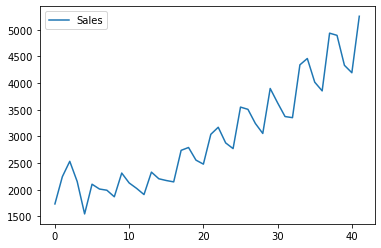

In [12]:
data.plot()

### Splitting data

In [22]:
data.shape

(42, 2)

In [25]:
Train = data.head(33)
Test = data.tail(9)

### Moving Average

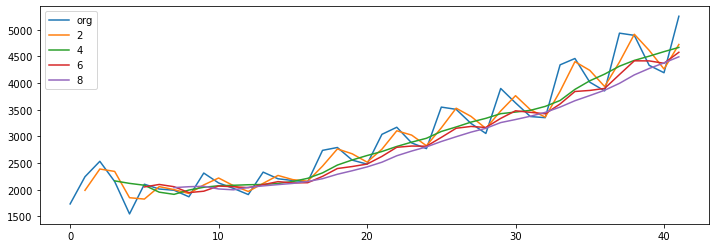

In [15]:
plt.figure(figsize=(12,4))
data.Sales.plot(label="org")
for i in range(2,10,2):
    data["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

## Time series decomposition plot

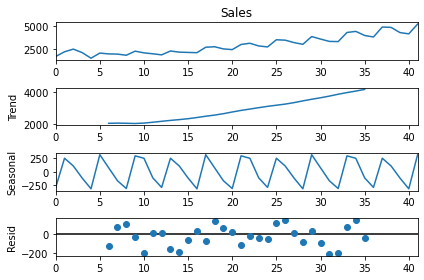

In [18]:
decompose_ts_add = seasonal_decompose(data.Sales,period=12)
decompose_ts_add.plot()
plt.show()

## ACF plots and PACF plots

/Users/vp054179/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


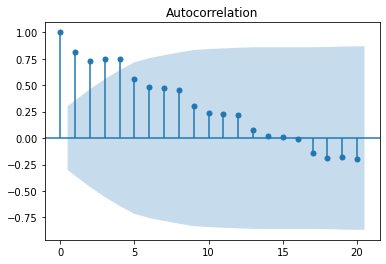

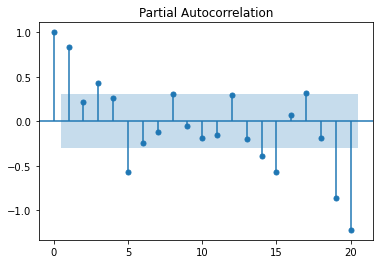

In [21]:

tsa_plots.plot_acf(data.Sales,lags=20)
tsa_plots.plot_pacf(data.Sales,lags=20)
plt.show()

## Evaluation Metric RMSE

In [28]:
def RMSE(pred,org):
    rmse = np.sqrt(mean_squared_error(org,pred))
    return rmse

## Simple Exponential Method

In [36]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_ses,Test.Sales)

1229.5210813225042

## Holt method¶

In [41]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hw,Test.Sales) 

1135.3462064475461

## Holts winter exponential smoothing with additive seasonality and additive trend

In [43]:
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_add_add,Test.Sales) 

547.4241746840299

## Holts winter exponential smoothing with multiplicative seasonality and additive trend


In [44]:
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
RMSE(pred_hwe_mul_add,Test.Sales)

366.30041054629606

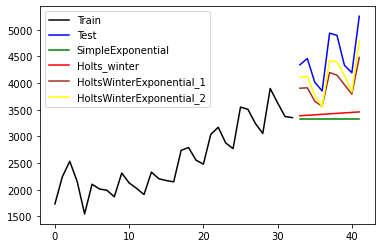

In [45]:

# Visualization of Forecasted values for Test data set using different methods 
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

## Final Model by combining train and test

In [47]:
hwe_model_mul_add = ExponentialSmoothing(data["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = data.index[0],end = data.index[-1])
RMSE(pred_hwe_mul_add,data.Sales)

155.9410499685994

In [48]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

33    3904.219872
34    3911.684007
35    3661.409117
36    3562.139261
37    4197.327772
38    4148.158456
39    3969.811726
40    3792.528921
41    4481.288738
42    4242.675927
dtype: float64